![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Perspective Transforms**

####**In this lesson we'll learn:**
1. Use OpenCV's getPerspectiveTransform
2. Use findContours to get corners and automate perspective Transform


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

def imshow(title, image, size=8):
    h, w = image.shape[0], image.shape[1]
    w_rat = w/h
    h_rat = h/w  
    plt.figure(figsize=(size*h_rat, size*h_rat))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)

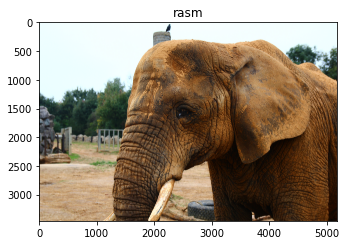

In [43]:
rasm = cv2.imread('Datasets/images/IMG_8295.JPG')
imshow('rasm',rasm)

Number of contours 54


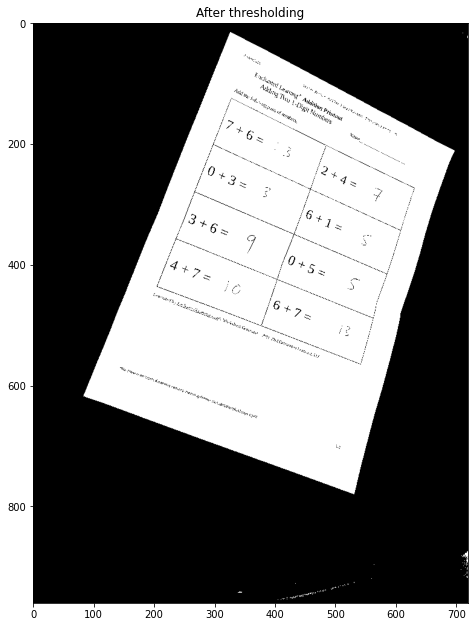

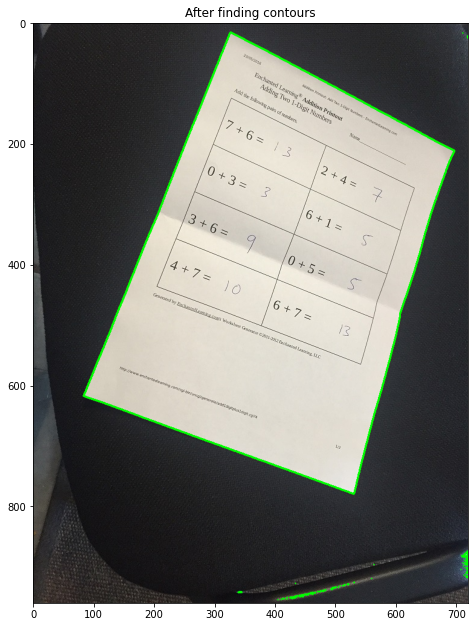

In [59]:
image = cv2.imread('Datasets/images/scan.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#thresholding
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #otsu avtomatik threshold 
imshow('After thresholding', th)

contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

contour_img = np.copy(th)
#draw contours 
cv2.drawContours(image,contours, -1, (0,255,0), thickness=2)


imshow('After finding contours', image)

print("Number of contours "+ str(len(contours)))

## **Approximate our contour above to just 4 points using approxPolyDP** 
## Ya'ni contour topilgan eng katta uzun nuqtalarni 4 tasini aniqlab olamiz

In [69]:
# Sort contours large to small by area #reverse yoqilsa descending orderda qaytaradi. Yani kamayish tartibda orqadan oldinga qarab
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True) 

#Loop over contours 
for cnt in sorted_contours: 
    #approximate contour 
    perimetr = cv2.arcLength(cnt, closed=True)
    approx = cv2.approxPolyDP(curve=cnt, epsilon=0.05*perimetr,closed=True)
    
    if len(approx) == 4: #4 ta asosiy kontourlarni 
        break
print("Our 4 points are: ") 
print(approx) #top left, bottom left, bottom right, top right

Our 4 points are: 
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


# 2. **Use getPerspectiveTransform and warpPerspective to create our top down view**  - Perspective Transform orqali korinishni tikkalash



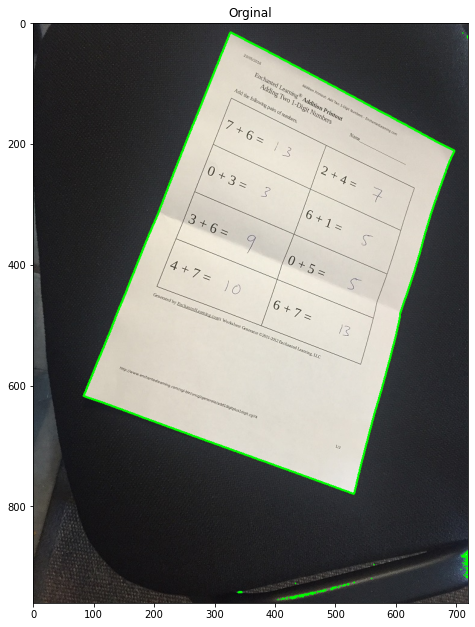

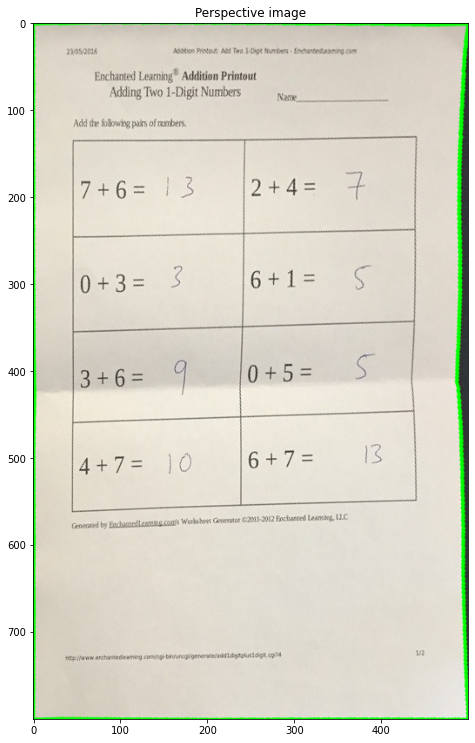

In [83]:
# Order obtained here is top left, bottom left, bottom right, top right
input_pts = np.float32(approx) #floatda bolishi lozim perspective uchun 
output_pts = np.float32([[0,0], #top-left
                        [0,800], #bottom_left
                        [500,800], #bottom_right
                        [500,0]]) #top right


#Get our Transform matrix, M 
M = cv2.getPerspectiveTransform(src=input_pts, dst=output_pts)
perspected_img = cv2.warpPerspective(src=image, M=M, dsize=(500,800))

imshow("Orginal", image)
imshow("Perspective image", perspected_img)
